In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ML_GRB import ML_GRB, RND_FOREST

In [2]:
dir_path = ''       # directory path

obj = ML_GRB()      # initializing the main class ---> see ML_GRB.py
obj.DataReading(dir_path)       # reading the data ---> see functions.py

In [3]:
obj.DatasetExtrapolation()
dataset = obj.dataset

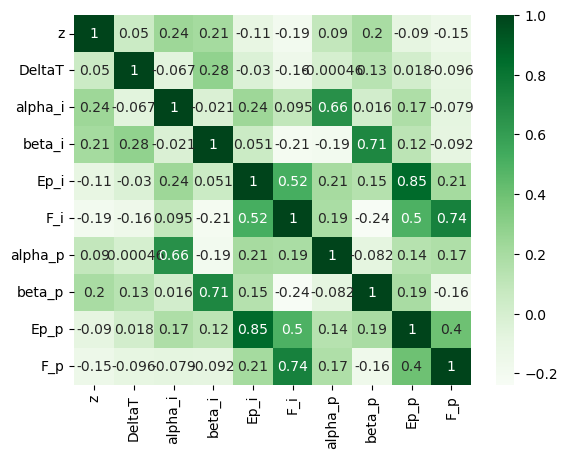

In [4]:
import matplotlib.pyplot as plt

obj.CorrMatrix(dataset)
plt.savefig(dir_path + 'images/DatasetCorrMatrix.png')

In [4]:
# Inizialising the model class ---> see ML_GRB.py
model = RND_FOREST()
obj.SetModel(model)     # Setting the model in the main class

dataset['z'] = np.log10(1 + dataset['z'])       # IDK

# Fitting the model ---> see functions.py
obj.model.Run(dataset, train_size = 0.8,
              n_estimators = 500, max_depth = 20)

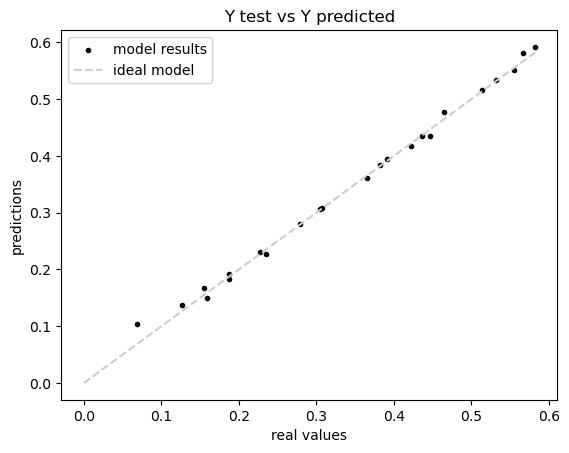

The test score is : 0.995 while the train score is: 0.998


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Printing the results
test_score = obj.model.forest.score(obj.model.X_test, obj.model.y_test)
train_score = obj.model.forest.score(obj.model.X_train, obj.model.y_train)

fig, ax = plt.subplots()
ax.set(title = 'Y test vs Y predicted', 
       xlabel = 'real values', 
       ylabel = 'predictions')

ax.scatter(obj.model.y_test, obj.model.y_pred, color='k', marker='.', label='model results')

x_values = np.linspace(0, max(obj.model.y_test), 100)
ax.plot(x_values, x_values, color='0.8', linestyle = '--', label='ideal model')

ax.legend(loc='best')
plt.show()
    
print('The test score is : {:.3f} while the train score is: {:.3f}'.format(test_score, train_score))

In [17]:
# trying grid search

# Let's try

import numpy as np
from sklearn.metrics import mean_squared_error

# Inizialising the model class ---> see ML_GRB.py
model = RND_FOREST()
obj.SetModel(model)     # Setting the model in the main class

dataset['z'] = np.log10(1 + dataset['z'])

# Setting the hyperparameters space to investigate
grid = {
        'rf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
        'rf__n_jobs': [-1]
    }

# Running the Grid Search 
obj.model.GridSearch(dataset, grid, cv = 10, train_size = 0.8, scoring = 'neg_median_absolute_error')

results = pd.DataFrame(obj.model.Grid_search_class.cv_results_)

a = results[['std_test_score']].to_numpy()
min_a = min(a)
index = np.where(a == min_a)

In [9]:
results.iloc[index[0]][['param_rf__max_depth']].style

,param_rf__max_depth
1,2


In [10]:
obj.model.Grid_search_class.best_params_

{'rf__max_depth': 19, 'rf__n_jobs': -1}

In [11]:
results.style

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.346360,0.029535,0.050861,0.007520,1,-1,"{'rf__max_depth': 1, 'rf__n_jobs': -1}",-0.418068,-0.419647,-0.570188,-0.479895,-0.719849,-0.521529,0.113592,20,-0.512029,-0.499003,-0.461764,-0.524570,-0.433288,-0.486131,0.033764
1,0.352328,0.041102,0.055366,0.014481,2,-1,"{'rf__max_depth': 2, 'rf__n_jobs': -1}",-0.169861,-0.136375,-0.234040,-0.190652,-0.377211,-0.221628,0.083985,19,-0.185887,-0.183617,-0.179233,-0.217840,-0.182955,-0.189906,0.014130
2,0.310547,0.026253,0.048659,0.008747,3,-1,"{'rf__max_depth': 3, 'rf__n_jobs': -1}",-0.082729,-0.070964,-0.161787,-0.126302,-0.361491,-0.160654,0.105483,18,-0.088408,-0.114482,-0.098542,-0.117875,-0.089561,-0.101774,0.012321
3,0.321261,0.029836,0.046775,0.005815,4,-1,"{'rf__max_depth': 4, 'rf__n_jobs': -1}",-0.055656,-0.040600,-0.134852,-0.086068,-0.335995,-0.130634,0.107615,5,-0.087820,-0.072265,-0.083596,-0.076106,-0.054118,-0.074781,0.011686
4,0.344673,0.027031,0.056351,0.004089,5,-1,"{'rf__max_depth': 5, 'rf__n_jobs': -1}",-0.047807,-0.067658,-0.139823,-0.100750,-0.345495,-0.140307,0.107239,15,-0.063608,-0.061254,-0.079023,-0.086302,-0.055531,-0.069144,0.011578
5,0.337270,0.029259,0.053962,0.012044,6,-1,"{'rf__max_depth': 6, 'rf__n_jobs': -1}",-0.042880,-0.063783,-0.144018,-0.095043,-0.315604,-0.132266,0.097792,7,-0.068997,-0.072217,-0.068808,-0.067605,-0.047635,-0.065052,0.008842
6,0.333038,0.025692,0.049541,0.007291,7,-1,"{'rf__max_depth': 7, 'rf__n_jobs': -1}",-0.044615,-0.067024,-0.130955,-0.086255,-0.352358,-0.136241,0.111731,11,-0.070379,-0.069594,-0.082863,-0.069403,-0.057513,-0.069950,0.008025
7,0.346137,0.025687,0.068596,0.023284,8,-1,"{'rf__max_depth': 8, 'rf__n_jobs': -1}",-0.046750,-0.053003,-0.168093,-0.110345,-0.309380,-0.137514,0.096531,12,-0.073909,-0.058734,-0.090505,-0.067157,-0.037601,-0.065581,0.017452
8,0.332475,0.018724,0.059442,0.007366,9,-1,"{'rf__max_depth': 9, 'rf__n_jobs': -1}",-0.041297,-0.067035,-0.141354,-0.086699,-0.299830,-0.127243,0.092348,2,-0.075098,-0.063089,-0.088067,-0.066298,-0.041957,-0.066902,0.015181
9,0.340411,0.030262,0.056881,0.014832,10,-1,"{'rf__max_depth': 10, 'rf__n_jobs': -1}",-0.054542,-0.073417,-0.121668,-0.100780,-0.352581,-0.140598,0.108443,16,-0.066666,-0.067410,-0.063721,-0.085043,-0.056206,-0.067809,0.009485


In [12]:
results.iloc[index[0]].style

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.352328,0.041102,0.055366,0.014481,2,-1,"{'rf__max_depth': 2, 'rf__n_jobs': -1}",-0.169861,-0.136375,-0.234040,-0.190652,-0.377211,-0.221628,0.083985,19,-0.185887,-0.183617,-0.179233,-0.217840,-0.182955,-0.189906,0.014130


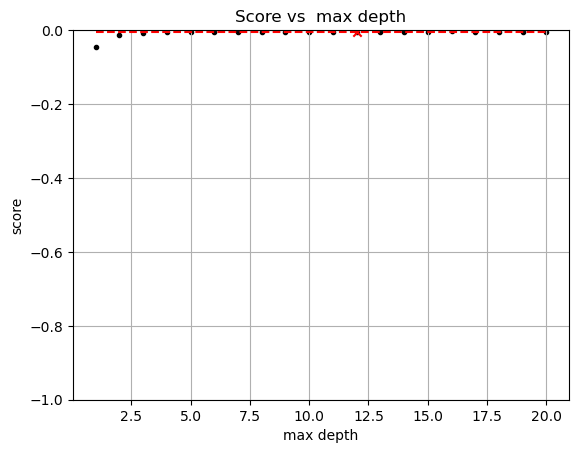

In [18]:
x = results['param_rf__max_depth'].to_numpy()
y = results['mean_test_score'].to_numpy()

X = x[index[0]]
Y = y[index[0]]

fig, ax = plt.subplots()
ax.set(title = 'Score vs  max depth', 
       xlabel = 'max depth', 
       ylabel = 'score', 
       ylim = [-1, 0])
ax.scatter(x, y, marker='.', color='k')
ax.scatter(X, Y, marker='x', color='r')
ax.plot(np.linspace(x[0], x[-1], 100), np.full(100, Y), linestyle='--', color='r')
ax.grid()
plt.show()

In [56]:
# let's try a loop

# Inizialising the model class ---> see ML_GRB.py
model = RND_FOREST()
obj.SetModel(model)     # Setting the model in the main class

test_scores = []
train_scores = []
for i in range(1000):
    # Fitting the model ---> see functions.py
    obj.model.Run(dataset, train_size = 0.8, 
                  n_estimators = 100, max_depth = 11, random_state = i)

    test_score = obj.model.forest.score(obj.model.X_test, obj.model.y_test)
    train_score = obj.model.forest.score(obj.model.X_train, obj.model.y_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)
    
fig, ax = plt.subplots()
ax.set(
    title = 'Many data splitting test score', 
    xlabel = 'split n°', 
    ylabel = 'score'
)
for model, color, style, label in zip([test_scores, train_scores], ['b', 'g'], ['-', '--'], ['Test score', 'Train score']):
    ax.plot(range(len(model)), model, style, color=color, label=label)
ax.grid()
ax.legend(loc='best')
plt.show()

KeyboardInterrupt: 

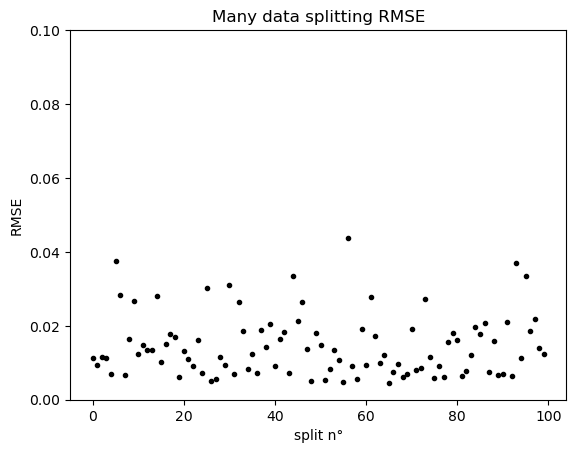

In [11]:
# let's try a loop

from sklearn.metrics import root_mean_squared_error

# Inizialising the model class ---> see ML_GRB.py
model = RND_FOREST()
obj.SetModel(model)     # Setting the model in the main class

test_scores = []
train_scores = []
for i in range(100):
    # Fitting the model ---> see functions.py
    obj.model.Run(dataset, train_size = 0.8, 
                  n_estimators = 100, max_depth = 8, random_state = i)

    # test_score = obj.model.forest.score(obj.model.X_test, obj.model.y_test)
    # train_score = obj.model.forest.score(obj.model.X_train, obj.model.y_train)
    
    test_scores.append(root_mean_squared_error(obj.model.y_test, obj.model.y_pred))
    # train_scores.append(train_score)
    
fig, ax = plt.subplots()
ax.set(
    title = 'Many data splitting RMSE', 
    xlabel = 'split n°', 
    ylabel = 'RMSE', 
    ylim = [0, 0.1]
)
ax.scatter(range(len(test_scores)), test_scores, marker='.', color='k')
plt.show()

4.5
0.85
1.12
1.06
2.04
1.48
0.45
0.36
0.69
1.25
0.17
2.9
0.61
2.82
2.61
2.77
0.81
2.35
0.55
2.3
1.5
0.13
1.92
0.44
1.26
0.35
1.31
2.09
1.55
2.06
0.82
1.7
1.6
0.94
1.95
1.03
2.43
2.69
1.64
3.04
2.59
0.69
4.35
2.05
2.26
2.77
1.55
2.1
3.6
0.74
0.54
0.9
0.54
1.8
3.0
2.11
0.9
0.1
0.49
1.37
1.55
0.54
1.57
1.44
1.73
1.46
1.77
1.61
0.82
0.98
5.0
0.72
1.73
2.2
1.41
2.49
2.2
0.34
2.27
2.49
0.48
1.24
1.29
1.69
2.4
0.64
1.21
3.96
1.03
0.72
1.32
1.32
2.09
1.76
0.59
2.06
0.76
2.33
0.81
0.97
1.17
0.37
1.41
0.69
0.96
1.6
1.31
1.62
0.84
0.43
0.71
1.02


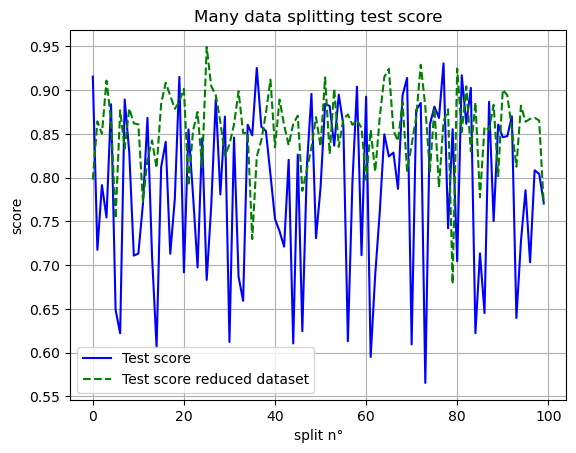

In [15]:
# Inizialising the model class ---> see ML_GRB.py
obj = ML_GRB()
obj.DataReading('')
obj.DatasetExtrapolation()
dataset = obj.dataset

model = RND_FOREST()
obj.SetModel(model)     # Setting the model in the main class

test_scores = []
test_scores_rd = []
for i in range(100):
    # Fitting the model ---> see functions.py
    obj.model.Run(dataset, train_size = 0.8, criterion='poisson', max_features='sqrt', 
                  n_estimators = 400, max_depth = 20, random_state = i)

    test_score = obj.model.forest.score(obj.model.X_test, obj.model.y_test)
    
    test_scores.append(test_score)
    
dataset = dataset[dataset['z'] < 3.3]
for i in range(100):
    # Fitting the model ---> see functions.py
    obj.model.Run(dataset, train_size = 0.8, criterion='poisson', max_features='sqrt', 
                  n_estimators = 400, max_depth = 20, random_state = i)

    test_score_rd = obj.model.forest.score(obj.model.X_test, obj.model.y_test)    
    
    
    test_scores_rd.append(test_score_rd)
    
fig, ax = plt.subplots()
ax.set(
    title = 'Many data splitting test score', 
    xlabel = 'split n°', 
    ylabel = 'score'
)
for model, color, style, label in zip([test_scores, test_scores_rd], ['b', 'g'], ['-', '--'], ['Test score', 'Test score reduced dataset']):
    ax.plot(range(len(model)), model, style, color=color, label=label)
ax.grid()
ax.legend(loc='best')
plt.show()

WOW

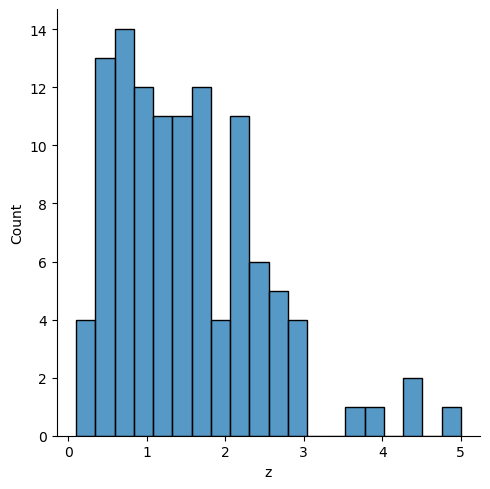

In [ ]:
# Testing the distribution of redshift
import seaborn as sns
from ML_GRB import ML_GRB


new = ML_GRB()
new.DataReading('')
new.DatasetExtrapolation()
data = new.dataset

sns.displot(data, x = 'z', bins = 20)

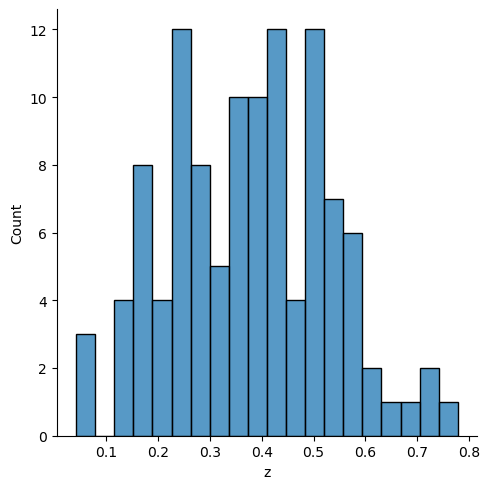

In [3]:
# Testing the distribution of redshift
import seaborn as sns
from ML_GRB import ML_GRB


new = ML_GRB()
new.DataReading('')
new.DatasetExtrapolation()
data = new.dataset

data['z'] = np.log10(1 + data['z'])

sns.displot(data, x = 'z', bins = 20)

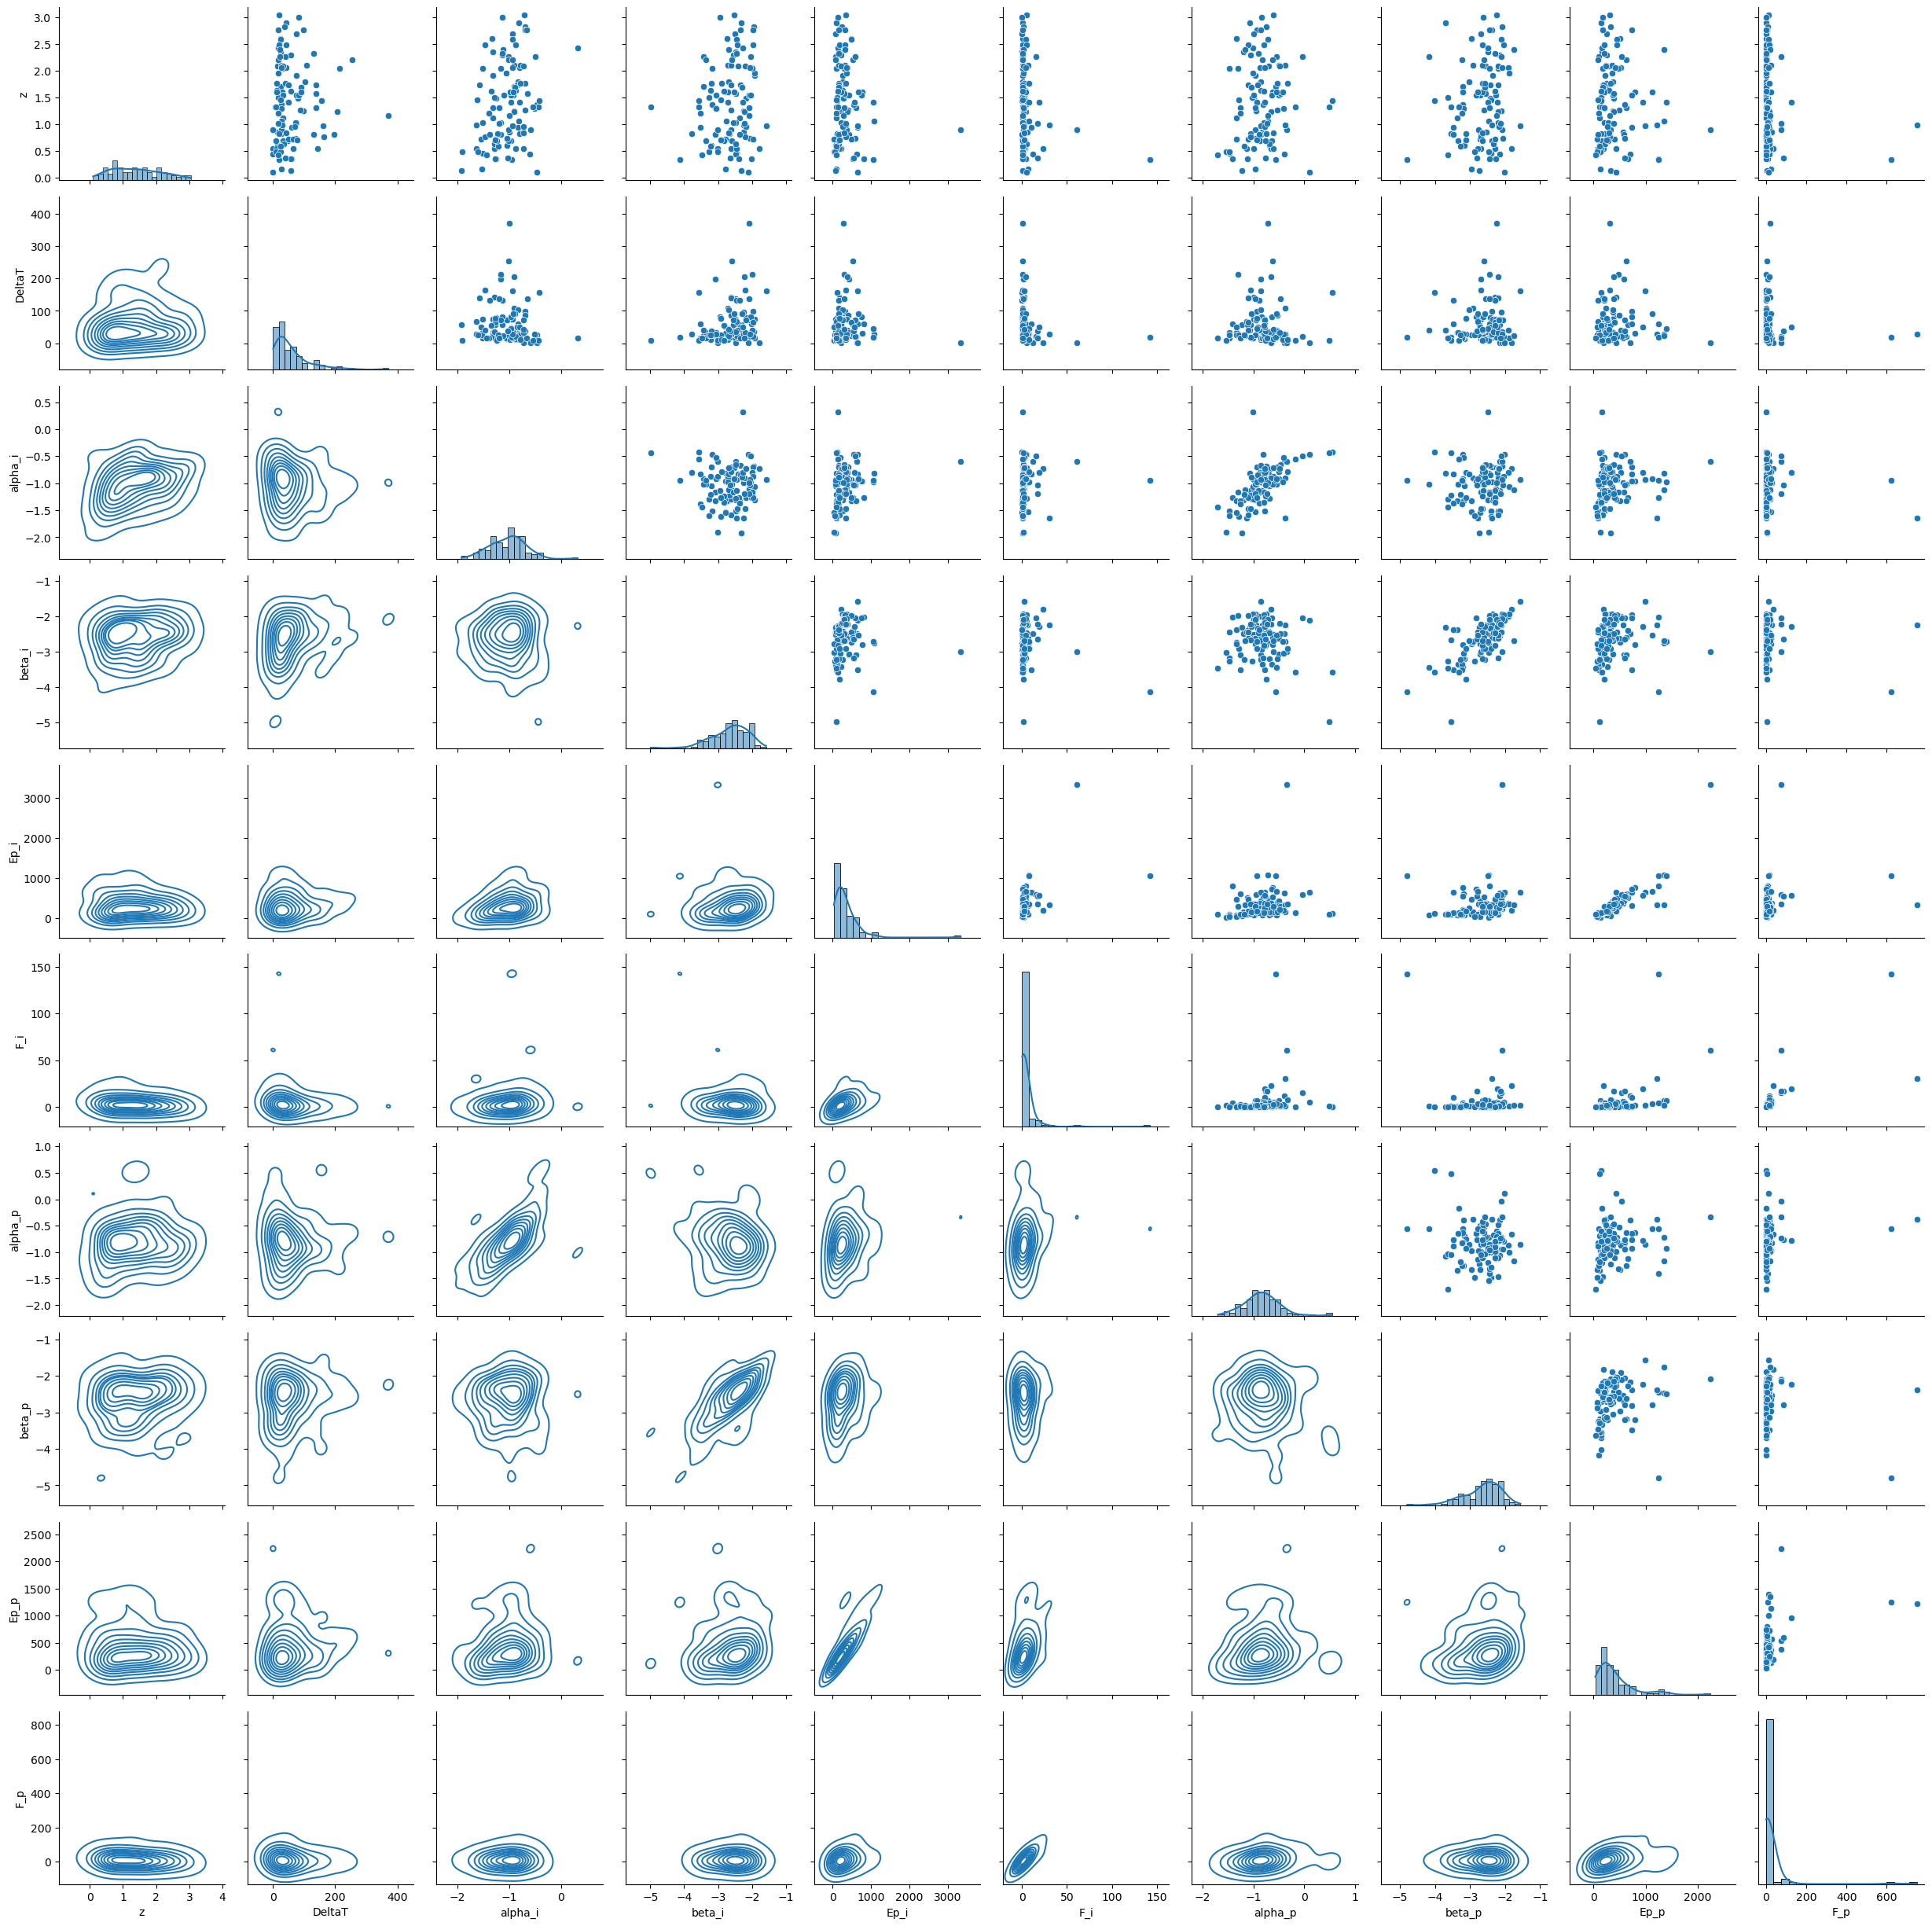

In [ ]:
# Just trying learning seaborn (had nothing to do with the project)

g = sns.PairGrid(dataset)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, bins=20, kde=True)

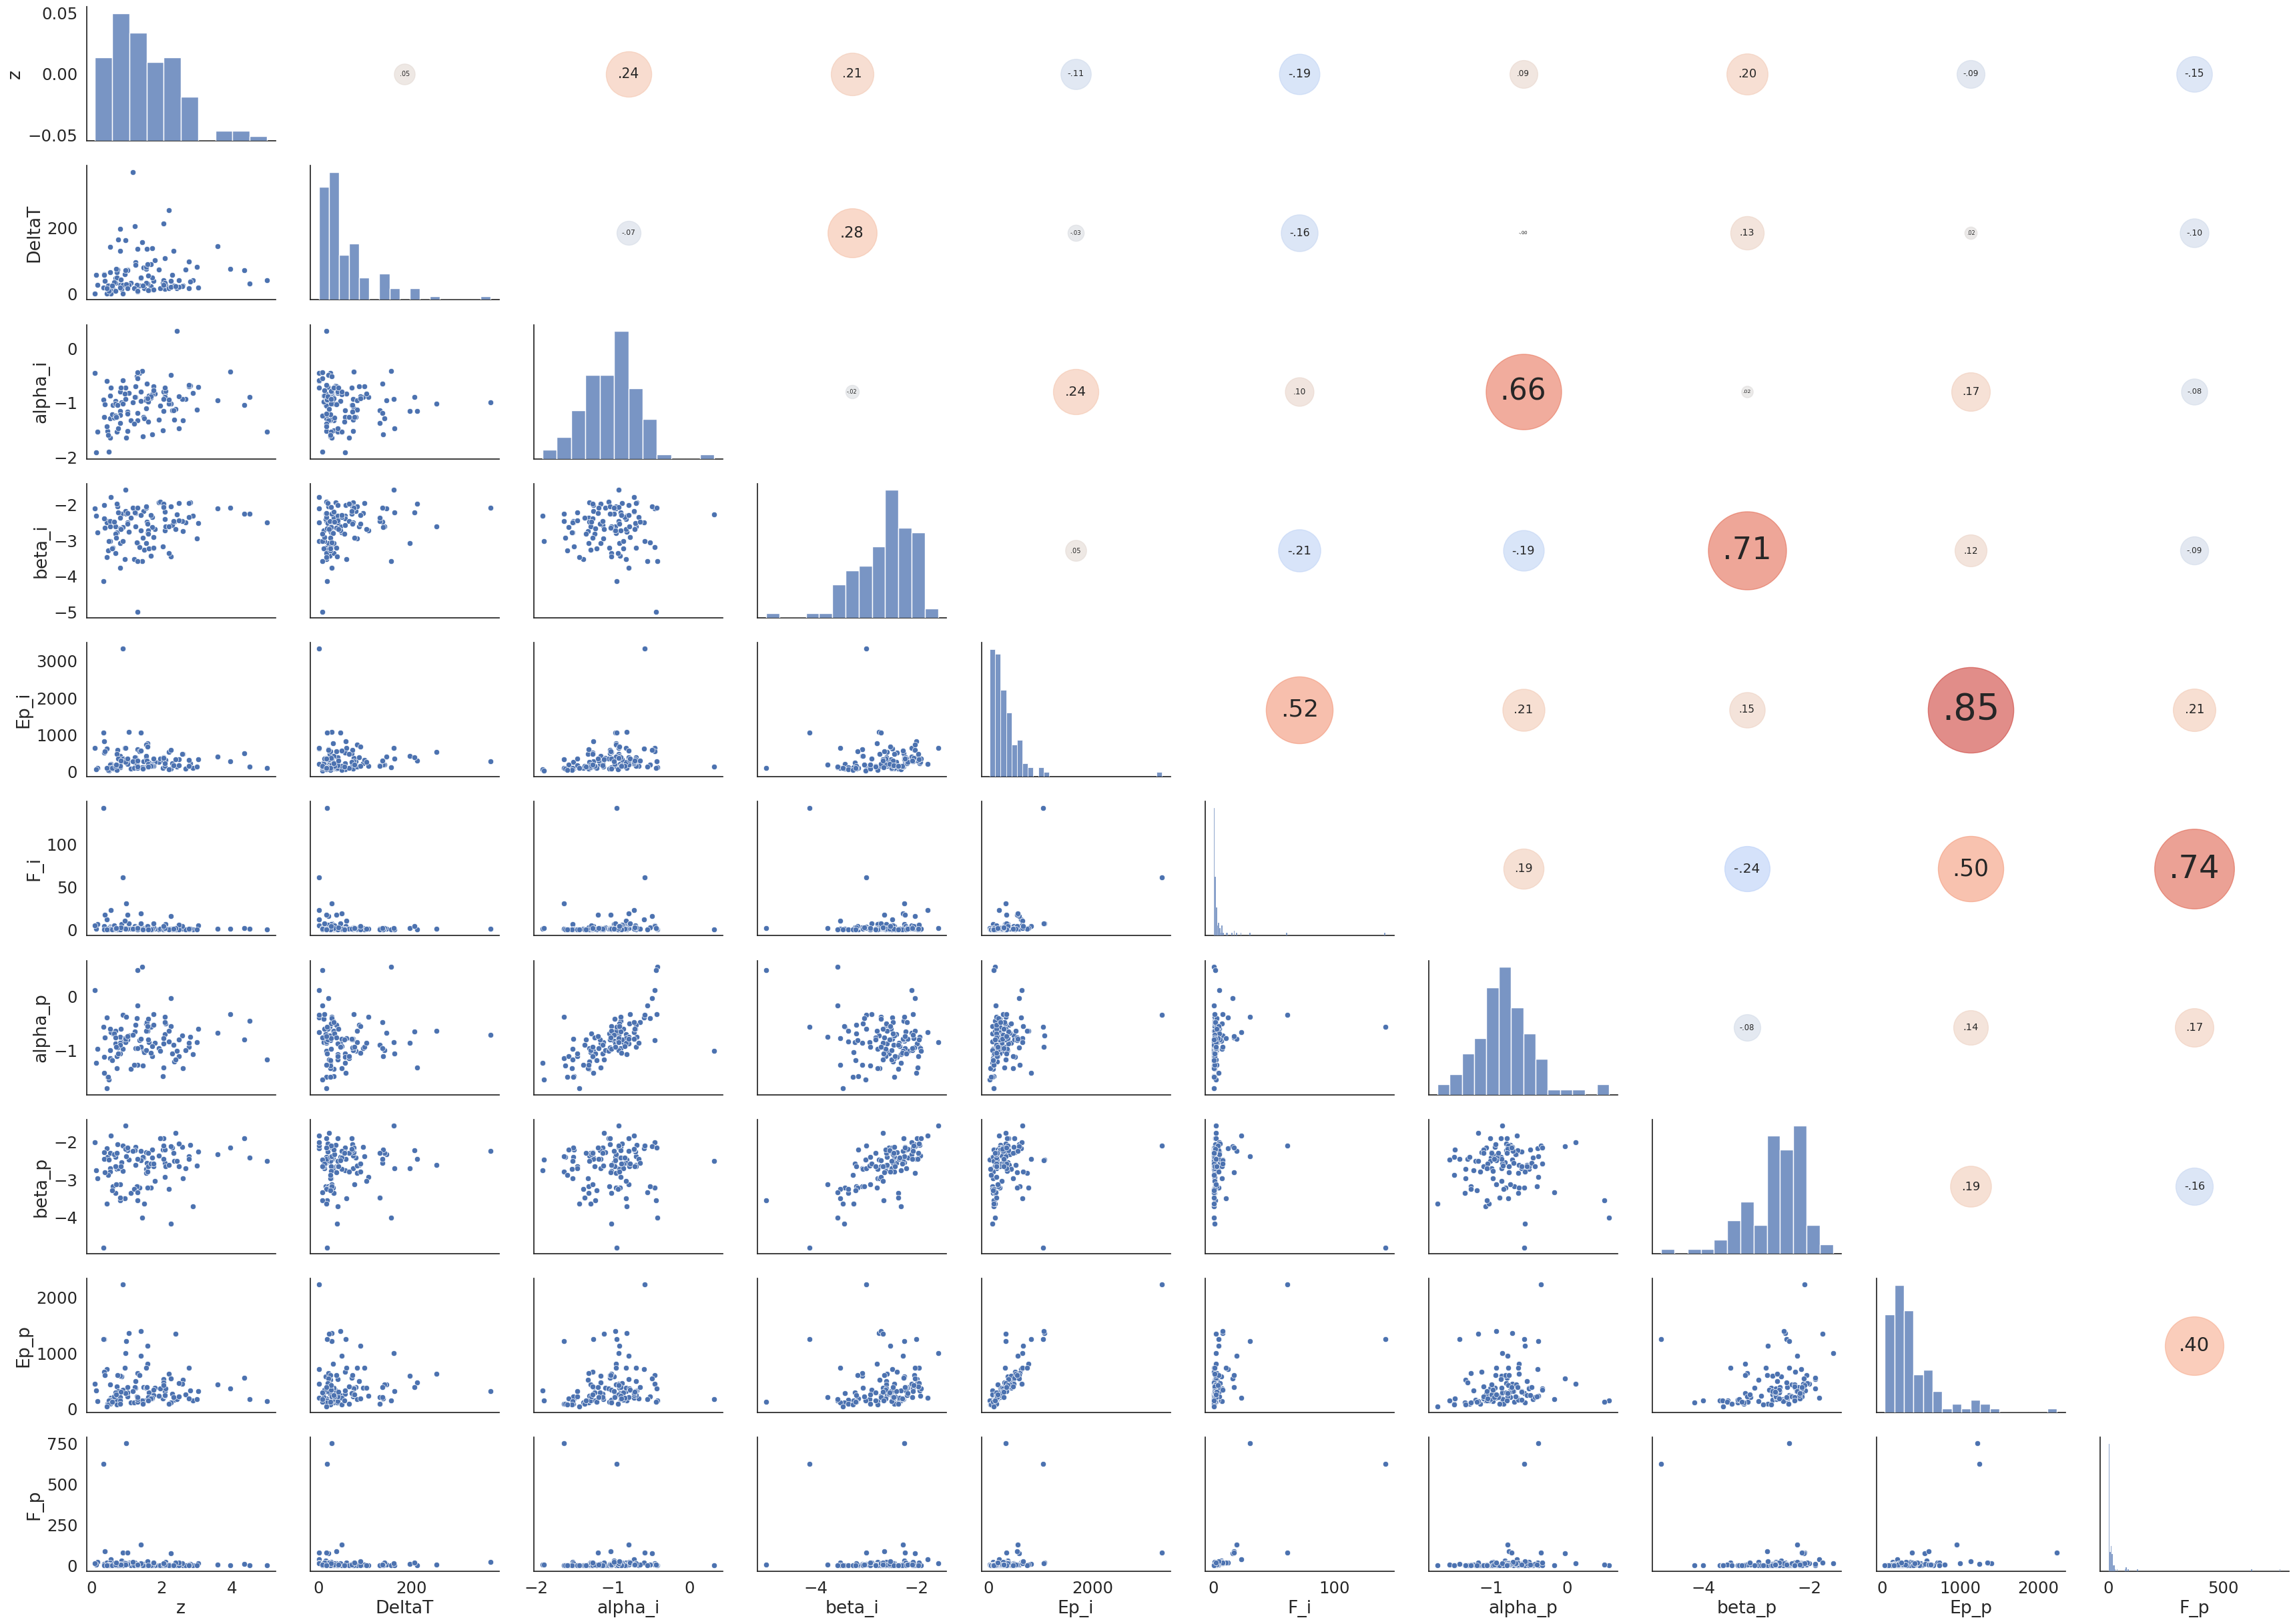

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

new = ML_GRB()
new.DataReading('')
new.DatasetExtrapolation()
data = new.dataset

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm", vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5], xycoords="axes fraction", ha='center', va='center', fontsize=font_size)

g = sns.PairGrid(data, aspect=1.4, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_upper(corrdot)
plt.show()